# `multiloan` tutorial
This interactive tutorial is a supplement to the [documentation](Documentation.md). It shows examples of using the three classes within `multiloan`:
1. `Loan`
2. `Multiloan`
3. `Payrange`

A general note about Jupyter notebooks: you can print the entire docstring for an object by running `?Object` or by placing your cursor after an object and pressing `Shift+tab`. This is helpful in seeing what parameters, functions, and properties each object offers.

*Note: If the `payment` you provide when making a loan causes the balance to exceed $1,000,000, you will get an error. If you anticipate your loan exceeding this amount then you can specify a higher amount with the `stop` parameter in the `Loan` object. Of course, another option is to increase the `payment` amount, in hopes of not hitting this limit*

In [1]:
from multiloan.loans import Loan, MultiLoan, Payrange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `Loan`
Describe the features and payment history for a single loan.

In [9]:
"""Simulate paying off a single loan"""
principal = 10000
rate = .05
monthly_payment = 500

# n=365 and t=1/12 by default, assuming that `rate` is describing the annual rate
loan = Loan(principal, rate, monthly_payment)

# Now that we have created the loan object, we can pay it off
loan.pay_remaining()
loan

Loan(original=$10,000.00, balance=$0.00, rate=0.05)

In [47]:
"""Review payment history"""
# We can access the balance history 
print('Balances: ', loan.balances)
# Or the payment history
print('Payment amounts: ', loan.payments)
# Or the total amount paid
print('Total piad: ', loan.totalpay)
print()

# Or, likely most useful, is a dataframe containing all data pertaining to this loan
print('Loan DataFrame head:')
loan.df.head()

Balances:  [10000.    9541.75  9081.59  8619.51  8155.5   7689.55  7221.65  6751.8
  6279.99  5806.21  5330.45  4852.71  4372.97  3891.23  3407.48  2921.71
  2433.91  1944.07  1452.19   958.25   462.25     0.  ]
Payment amounts:  [  0.   500.   500.   500.   500.   500.   500.   500.   500.   500.
 500.   500.   500.   500.   500.   500.   500.   500.   500.   500.
 500.   464.18]
Total piad:  10464.18

Loan DataFrame head:


,amount,balance,payment
0,0.0,10000.00,0
1,500.0,9541.75,1
2,500.0,9081.59,2
3,500.0,8619.51,3
4,500.0,8155.50,4


# Multiloan
Describe the features and payment history of simultaneously paying off multiple loans. Multiple loan data can be provided by providing a list of `Loan` objects or by providing a file that contains data for multiple loans, as is shown in this example.

In [25]:
"""Let's use this file to provide loan data"""
filepath = 'data/tutorial_data.csv'
pd.read_csv(filepath)

,principal,rate,payment
0,10000,0.05,50
1,13000,0.06,75
2,7000,0.03,50


In [26]:
"""Create and payoff multipleloans"""
# Create
ml = MultiLoan(filepath=filepath, payment=1500)
# Pay off
ml.pay_remaining()
ml

Multiloan(loans=3, original=$30,000.00, balance=$0.00)

In [27]:
"""Get payment history"""
# We can access Multiloan data individually
# Like the balance history
print('Balances :', ml.balances)
# We can also access the balance history for *each* loan
print()
print('Loan balances: \n', ml.loan_balances)

Balances : [30000.   28624.43 27242.06 25852.84 24456.76 23053.75 21643.81 20226.89
 18802.96 17371.99 15933.93 14489.3  13038.7  11582.09 10119.46  8650.77
  7176.01  5695.16  4209.42  2719.96  1226.77     0.  ]

Loan balances: 
 [[10000.    9991.75  9983.47  9975.15  9966.8   9958.41  9949.99  9941.53
   9933.04  9924.51  9262.4   7851.07  6433.85  5010.71  3581.63  2146.58
    705.54     0.       0.       0.       0.       0.  ]
 [13000.   11665.16 10323.63  8975.37  7620.36  6258.55  4889.92  3514.43
   2132.04   742.73     0.       0.       0.       0.       0.       0.
      0.       0.       0.       0.       0.       0.  ]
 [ 7000.    6967.52  6934.96  6902.32  6869.6   6836.79  6803.9   6770.93
   6737.88  6704.75  6671.53  6638.23  6604.85  6571.38  6537.83  6504.19
   6470.47  5695.16  4209.42  2719.96  1226.77     0.  ]]


In [36]:
"""Payment schedule"""
# One thing we could do is export the payment schedule for each loan
loan_payments = ml.loan_payments
# Put them in a dataframe
lp_df = pd.DataFrame(loan_payments).rename_axis(index='loan', columns='month')
# Save
# lp_df.to_csv('multiloan_payment_schedule.csv')
lp_df

month,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
loan,,,,,,,,,,,,,,,,,,,,,
0,0.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,1450.0,1450.0,1450.0,1450.0,1450.0,708.49,0.0,0.0,0.0,0.00
1,0.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
2,0.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,791.51,1500.0,1500.0,1500.0,1229.84


In [28]:
# Again, most conveniently we can access this data with a dataframe
# The `loan` column contains data for each loan (loan_0, loan_1, ...) and 'total' which is the sum over all loans
ml_df = ml.df
# Since each payment is made on a monthly basis, we can convert months->years
ml_df['years'] = ml_df.payment/12
ml_df.head()

,loan,amount,balance,payment,years
0,loan_0,0.0,10000.00,0,0.000000
1,loan_0,50.0,9991.75,1,0.083333
2,loan_0,50.0,9983.47,2,0.166667
3,loan_0,50.0,9975.15,3,0.250000
4,loan_0,50.0,9966.80,4,0.333333


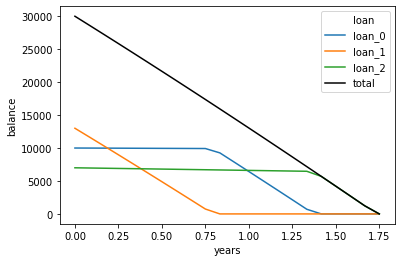

In [29]:
"""Visualize balance history for these loans"""
# Create a color palette for the different loans
palette = dict(zip(ml_df.loan.unique(), sns.color_palette()))
palette['total'] = 'k'

sns.lineplot('years', 'balance', 'loan', data=ml_df, palette=palette)
plt.show()

# Payrange
Analyze the total amount paid for a loan/multiloan with a range of recurring payment amounts

In [6]:
"""Let's create a payrange with our multiloan"""
# Let's analyze payments from 100->1500 by 100
r = range(100, 1600, 100)
# Using the previously defined multiloan, `ml`
pr = Payrange(ml, r)
pr

/Users/michaelsilverstein/Documents/Loans/multiloan/loans.py:428: UserWarning: A payment amount was skipped because it surpassed stop criteria
  warn('A payment amount was skipped because it surpassed stop criteria')


Payrange(low=200, high=1500)

*Notice the warning! It is indicating that at least one of the payment amounts led a loan to hit the `stop` criteria and has thus been exclude from the `Payrange` (hence the low=200 and not 100)*

In [8]:
"""Here is what the payrange dataframe looks like"""
# Extract df
pr_df = pr.df
# Convert months -> years
pr_df['n_years'] = pr_df.n_payments/12
pr_df.head()

,amount,total,pct_change,n_payments,loan,n_years
0,200,47607.95,-0.196704,239,total,19.916667
1,300,38243.27,-0.072418,128,total,10.666667
2,400,35473.76,-0.038191,89,total,7.416667
3,500,34118.99,-0.023697,69,total,5.750000
4,600,33310.47,-0.016171,56,total,4.666667


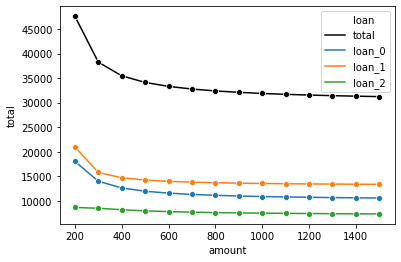

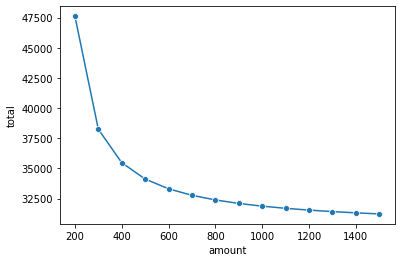

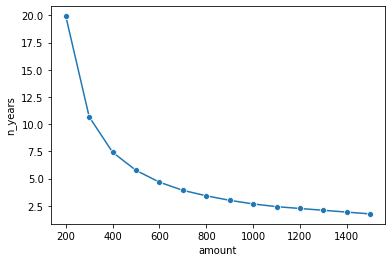

In [19]:
"""Visualize payrange"""
# Let's look at how the total amount changes
sns.lineplot('amount', 'total', 'loan', data=pr_df, palette=palette, marker='o')
plt.show()

# We could also just look at the total by subsetting the dataframe
pr_df_total = pr_df[pr_df.loan.eq('total')]
sns.lineplot('amount', 'total', data=pr_df_total, marker='o')
plt.show()

# We could also look at the number of years per amount instead of the total paid
sns.lineplot('amount', 'n_years', data=pr_df_total, palette=palette, marker='o')
plt.show()